<h1>STRESS DETECTION SYSTEM</h1>

<H2>PROBLEM STATEMENT</H2>

The objective of this project is to predict stress levels using machine learning techniques based on lifestyle, health, and behavioral features. Early detection of stress can support timely intervention and improve overall mental well-being.

<H3>OVERVIEW</H3>

University life is often considered one of the most stressful phases in a student’s life due to academic workload, competitive environment, social expectations, financial concerns, and future career uncertainty. Continuous exposure to such stressors can negatively impact students mental health, academic performance, and overall quality of life.
For this project i have used a google form survey as my secondary dataset so that i can train my model for both the real time as well as the past dataset which i have taken from kaggle as csv file .While doing this project I  am going to use severel machine algorithms like random forest and many measures checking like precision ,accuracy.I will try to visulaize my data so that you can understand the data very well and in a wellstructured mannner.
The steps which are going to be involved are:
1.importing libraries like pandas,numpy ,sklearn,matplotlib,sns etc
2.importing the csv file and gooogle form data into the jupyter notebook
3.loading the dataset
4.checking the features like its shape,size,info,summary etc
5.checking and handling the missing values if any using the mean, mode depending on the numerical and categorical data
6.visulaize the data
7.training the model by using both the google form as well as dataset
8.making splits fpor training data and testing data and applying the machine algorithm 
9.checking the accuracy
10.visulaizing some more like heatmaps,confusion matrix etc.
11.giving a conclusion note 





In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [4]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [5]:
!pip install xgboost





In [6]:
import xgboost as xgb
import joblib



In [7]:
import pandas as pd
import urllib.parse
sheet_id= "1-aDBEK-v4LFpvN3YCy4jhHSSekMVNm9KmOvVwr355_o"
sheet_name="Student Stress & Lifestyle Survey "
encoded_name = urllib.parse.quote(sheet_name)

url=f"https://docs.google.com/spreadsheets/d/1-aDBEK-v4LFpvN3YCy4jhHSSekMVNm9KmOvVwr355_o/gviz/tq?tqx=out:csv&sheet={encoded_name}"
form_df=pd.read_csv(url)
form_df

,Timestamp,Age,Gender,How many hours of sleep do you get on average per day?,How many hours per day do you spend studying or boosting your skills?,How many minutes per day do you exercise?,How many hours per day do you spend on screens (excluding academic work)?,Do you use your phone/laptop late at night?,How much social time friends/family do you get daily?\n,How many cups of coffee/energy drinks do you consume daily?,"On a scale of 1–10, how stressed do you feel daily?\n",Which of these best describes your current stress level?
0,8/27/2025 22:02:31,21,Female,8,0–2 hrs,1–15 min,4–5 hrs,Often,1–2 hrs,1–2,5,Low
1,8/27/2025 22:03:08,22,Female,9,3–5 hrs,1–15 min,4–5 hrs,Sometimes,1–2 hrs,1–2,1,Low
2,8/27/2025 22:03:21,22,Male,8,0–2 hrs,31–60 min,4–5 hrs,Always,1–2 hrs,3–4,6,High
3,8/27/2025 22:03:29,22,Female,7,3–5 hrs,1–15 min,4–5 hrs,Sometimes,1–2 hrs,0,4,Moderate
4,8/27/2025 22:04:36,25,Female,7,0–2 hrs,0,0–1 hr,Always,1–2 hrs,0,0,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...
67,8/29/2025 9:42:02,24,Male,7,3–5 hrs,0,4–5 hrs,Always,1–2 hrs,0,6,Moderate
68,8/29/2025 10:33:55,32,Male,6,3–5 hrs,16–30 min,0–1 hr,Often,1–2 hrs,1–2,3,Moderate
69,8/29/2025 10:36:24,30,Male,7,3–5 hrs,1–15 min,0–1 hr,Sometimes,1–2 hrs,1–2,1,Low
70,8/30/2025 14:11:12,21,Female,9,0–2 hrs,0,2–3 hrs,Sometimes,1–2 hrs,1–2,1,Low


In [8]:
form_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 12 columns):
 #   Column                                                                         Non-Null Count  Dtype 
---  ------                                                                         --------------  ----- 
 0   Timestamp                                                                      72 non-null     object
 1   Age                                                                            72 non-null     int64 
 2   Gender                                                                         72 non-null     object
 3     How many hours of sleep do you get on average per day?                       72 non-null     int64 
 4     How many hours per day do you spend studying or boosting your skills?        72 non-null     object
 5     How many minutes per day do you exercise?                                    72 non-null     object
 6     How many hours per day do you spen

In [9]:
form_df.columns

Index(['Timestamp', 'Age', 'Gender',
       '  How many hours of sleep do you get on average per day?  ',
       '  How many hours per day do you spend studying or boosting your skills?  ',
       '  How many minutes per day do you exercise?  ',
       '  How many hours per day do you spend on screens (excluding academic work)?  ',
       '  Do you use your phone/laptop late at night?  ',
       'How much social time friends/family do you get daily?\n',
       'How many cups of coffee/energy drinks do you consume daily?',
       'On a scale of 1–10, how stressed do you feel daily?\n',
       '  Which of these best describes your current stress level?  '],
      dtype='object')

In [10]:
df= pd.read_csv("lifestyle.csv")
df

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High
...,...,...,...,...,...,...,...,...
1995,1996,6.5,0.2,7.4,2.1,7.8,3.32,Moderate
1996,1997,6.3,2.8,8.8,1.5,4.6,2.65,Moderate
1997,1998,6.2,0.0,6.2,0.8,10.8,3.14,Moderate
1998,1999,8.1,0.7,7.6,3.5,4.1,3.04,High


In [11]:
df.shape

(2000, 8)

In [12]:
df.size

16000

In [13]:
df.dtypes

Student_ID                           int64
Study_Hours_Per_Day                float64
Extracurricular_Hours_Per_Day      float64
Sleep_Hours_Per_Day                float64
Social_Hours_Per_Day               float64
Physical_Activity_Hours_Per_Day    float64
GPA                                float64
Stress_Level                        object
dtype: object

In [14]:
df.columns

Index(['Student_ID', 'Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day',
       'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day',
       'Physical_Activity_Hours_Per_Day', 'GPA', 'Stress_Level'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Student_ID                       2000 non-null   int64  
 1   Study_Hours_Per_Day              2000 non-null   float64
 2   Extracurricular_Hours_Per_Day    2000 non-null   float64
 3   Sleep_Hours_Per_Day              2000 non-null   float64
 4   Social_Hours_Per_Day             2000 non-null   float64
 5   Physical_Activity_Hours_Per_Day  2000 non-null   float64
 6   GPA                              2000 non-null   float64
 7   Stress_Level                     2000 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 125.1+ KB


In [16]:
df.describe()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000
mean,1000.500000,7.475800,1.990100,7.501250,2.704550,4.32830,3.115960
std,577.494589,1.423888,1.155855,1.460949,1.688514,2.51411,0.298674
min,1.000000,5.000000,0.000000,5.000000,0.000000,0.00000,2.240000
25%,500.750000,6.300000,1.000000,6.200000,1.200000,2.40000,2.900000
50%,1000.500000,7.400000,2.000000,7.500000,2.600000,4.10000,3.110000
75%,1500.250000,8.700000,3.000000,8.800000,4.100000,6.10000,3.330000
max,2000.000000,10.000000,4.000000,10.000000,6.000000,13.00000,4.000000


In [17]:
df.isnull().sum()

Student_ID                         0
Study_Hours_Per_Day                0
Extracurricular_Hours_Per_Day      0
Sleep_Hours_Per_Day                0
Social_Hours_Per_Day               0
Physical_Activity_Hours_Per_Day    0
GPA                                0
Stress_Level                       0
dtype: int64

In [18]:
print(df.columns.tolist())


['Student_ID', 'Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day', 'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day', 'Physical_Activity_Hours_Per_Day', 'GPA', 'Stress_Level']


In [19]:
for col in ["Sleep_Hours_Per_Day", "Study_Hours_Per_Day", "Physical_Activity_Hours_Per_Day"]:
    print(f"Feature: {col}")
    print(f"  Mean: {df[col].mean():.2f}")
    print(f"  Median: {df[col].median():.2f}")
    print(f"  Mode: {df[col].mode()[0]}")
    print("-"*40)


Feature: Sleep_Hours_Per_Day
  Mean: 7.50
  Median: 7.50
  Mode: 5.4
----------------------------------------
Feature: Study_Hours_Per_Day
  Mean: 7.48
  Median: 7.40
  Mode: 6.3
----------------------------------------
Feature: Physical_Activity_Hours_Per_Day
  Mean: 4.33
  Median: 4.10
  Mode: 4.3
----------------------------------------


In [20]:

form_df = form_df.rename(columns={
    '  How many hours of sleep do you get on average per day?  ': "Sleep_Hours_Per_Day",
    '  How many hours per day do you spend studying or boosting your skills?  ': "Study_Hours_Per_Day",
    '  How many minutes per day do you exercise?  ': "Physical_Activity_Minutes_Per_Day",
    '  How many hours per day do you spend on screens (excluding academic work)?  ': "Screen_Time_Hours_Per_Day",
    '  Do you use your phone/laptop late at night?  ': "Late_Night_Device_Use",
    'How much social time friends/family do you get daily?\n': "Social_Hours_Per_Day",
    'How many cups of coffee/energy drinks do you consume daily?': "Caffeine_Intake",
    'On a scale of 1–10, how stressed do you feel daily?\n': "Stress_Score",
    '  Which of these best describes your current stress level?  ': "Stress_Level"
})

form_df["Physical_Activity_Minutes_Per_Day"] = pd.to_numeric(
    form_df["Physical_Activity_Minutes_Per_Day"], errors="coerce"
)
form_df["Physical_Activity_Hours_Per_Day"] = form_df["Physical_Activity_Minutes_Per_Day"] / 60

# -------------------------------
# Convert numeric columns safely
# -------------------------------
numeric_cols = [
    "Sleep_Hours_Per_Day",
    "Study_Hours_Per_Day",
    "Screen_Time_Hours_Per_Day",
    "Social_Hours_Per_Day",
    "Caffeine_Intake",
    "Stress_Score",
    "Physical_Activity_Hours_Per_Day"
]

for col in numeric_cols:
    form_df[col] = pd.to_numeric(form_df[col], errors="coerce")
form_df.head()


,Timestamp,Age,Gender,Sleep_Hours_Per_Day,Study_Hours_Per_Day,Physical_Activity_Minutes_Per_Day,Screen_Time_Hours_Per_Day,Late_Night_Device_Use,Social_Hours_Per_Day,Caffeine_Intake,Stress_Score,Stress_Level,Physical_Activity_Hours_Per_Day
0,8/27/2025 22:02:31,21,Female,8,NaN,NaN,NaN,Often,NaN,NaN,5,Low,NaN
1,8/27/2025 22:03:08,22,Female,9,NaN,NaN,NaN,Sometimes,NaN,NaN,1,Low,NaN
2,8/27/2025 22:03:21,22,Male,8,NaN,NaN,NaN,Always,NaN,NaN,6,High,NaN
3,8/27/2025 22:03:29,22,Female,7,NaN,NaN,NaN,Sometimes,NaN,0.0,4,Moderate,NaN
4,8/27/2025 22:04:36,25,Female,7,NaN,0.0,NaN,Always,NaN,0.0,0,Moderate,0.0


In [21]:
import pandas as pd

lifestyle_df = pd.read_csv("lifestyle.csv")  
form_df = form_df.rename(columns={
    '  How many hours of sleep do you get on average per day?  ': "Sleep_Hours_Per_Day",
    '  How many hours per day do you spend studying or boosting your skills?  ': "Study_Hours_Per_Day",
    '  How many minutes per day do you exercise?  ': "Physical_Activity_Hours_Per_Day",
    '  How many hours per day do you spend on screens (excluding academic work)?  ': "Screen_Time_Hours_Per_Day",
    'How much social time friends/family do you get daily?\n': "Social_Hours_Per_Day",
    'How many cups of coffee/energy drinks do you consume daily?': "Caffeine_Intake",
    'On a scale of 1–10, how stressed do you feel daily?\n': "Stress_Score",
    '  Which of these best describes your current stress level?  ': "Stress_Level"
})
mapping = {"Low": 0, "Medium": 1, "High": 2}
form_df["Stress_Level_Encoded"] = form_df["Stress_Level"].map(mapping)
form_features = [
    "Sleep_Hours_Per_Day", "Study_Hours_Per_Day", 
    "Physical_Activity_Hours_Per_Day", "Screen_Time_Hours_Per_Day",
    "Social_Hours_Per_Day", "Caffeine_Intake", "Stress_Score", "Stress_Level_Encoded"
]
form_clean = form_df[form_features]
lifestyle_df = lifestyle_df.rename(columns={"Stress_Level": "Stress_Level_Encoded"})
merged_df = pd.concat([lifestyle_df, form_clean], ignore_index=True)
X = merged_df.drop("Stress_Level_Encoded", axis=1)
y = merged_df["Stress_Level_Encoded"]

print("✅ Merged dataset shape:", merged_df.shape)
print(merged_df.head())


✅ Merged dataset shape: (2072, 11)
   Student_ID  Study_Hours_Per_Day  Extracurricular_Hours_Per_Day  \
0         1.0                  6.9                            3.8   
1         2.0                  5.3                            3.5   
2         3.0                  5.1                            3.9   
3         4.0                  6.5                            2.1   
4         5.0                  8.1                            0.6   

   Sleep_Hours_Per_Day  Social_Hours_Per_Day  Physical_Activity_Hours_Per_Day  \
0                  8.7                   2.8                              1.8   
1                  8.0                   4.2                              3.0   
2                  9.2                   1.2                              4.6   
3                  7.2                   1.7                              6.5   
4                  6.5                   2.2                              6.6   

    GPA Stress_Level_Encoded  Screen_Time_Hours_Per_Day  Caffei

In [22]:
form_df.isnull().sum()

Timestamp                             0
Age                                   0
Gender                                0
Sleep_Hours_Per_Day                   0
Study_Hours_Per_Day                  72
Physical_Activity_Minutes_Per_Day    59
Screen_Time_Hours_Per_Day            72
Late_Night_Device_Use                 0
Social_Hours_Per_Day                 72
Caffeine_Intake                      61
Stress_Score                          0
Stress_Level                          0
Physical_Activity_Hours_Per_Day      59
Stress_Level_Encoded                 31
dtype: int64

In [23]:
# --- Step 1: Handle numeric columns ---
numeric_cols = [
    "Study_Hours_Per_Day",
    "Physical_Activity_Minutes_Per_Day",
    "Screen_Time_Hours_Per_Day",
    "Social_Hours_Per_Day",
    "Caffeine_Intake",
    "Physical_Activity_Hours_Per_Day"
]

for col in numeric_cols:
    if col in merged_df.columns:
        merged_df[col] = merged_df[col].fillna(merged_df[col].median())-
categorical_cols = ["Gender", "Late_Night_Device_Use"]

for col in categorical_cols:
    if col in merged_df.columns:
        merged_df[col] = merged_df[col].fillna(merged_df[col].mode()[0])
if "Stress_Level_Encoded" in merged_df.columns:
    merged_df = merged_df.dropna(subset=["Stress_Level_Encoded"])

print("✅ Null values handled successfully!")
print(merged_df.isna().sum())
print("Final columns:", merged_df.columns.tolist())


✅ Null values handled successfully!
Student_ID                           41
Study_Hours_Per_Day                   0
Extracurricular_Hours_Per_Day        41
Sleep_Hours_Per_Day                   0
Social_Hours_Per_Day                  0
Physical_Activity_Hours_Per_Day       0
GPA                                  41
Stress_Level_Encoded                  0
Screen_Time_Hours_Per_Day          2041
Caffeine_Intake                       0
Stress_Score                       2000
dtype: int64
Final columns: ['Student_ID', 'Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day', 'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day', 'Physical_Activity_Hours_Per_Day', 'GPA', 'Stress_Level_Encoded', 'Screen_Time_Hours_Per_Day', 'Caffeine_Intake', 'Stress_Score']


Feature: Sleep_Hours_Per_Day
  Mean: 7.50
  Median: 7.50
  Mode: 5.4
--------------------------------------------------


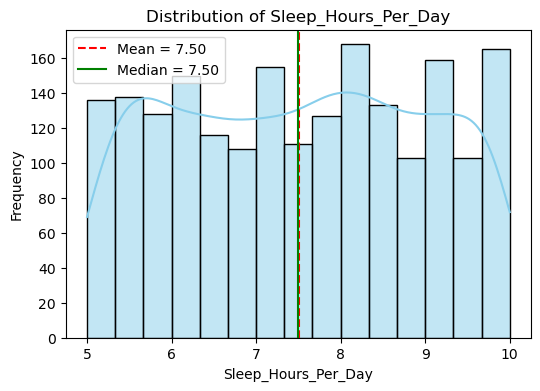

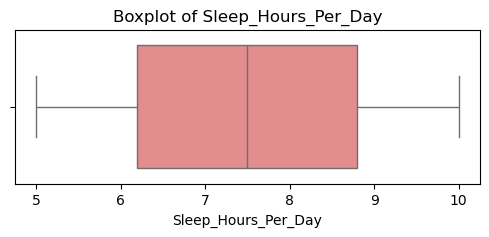

Feature: Study_Hours_Per_Day
  Mean: 7.48
  Median: 7.40
  Mode: 6.3
--------------------------------------------------


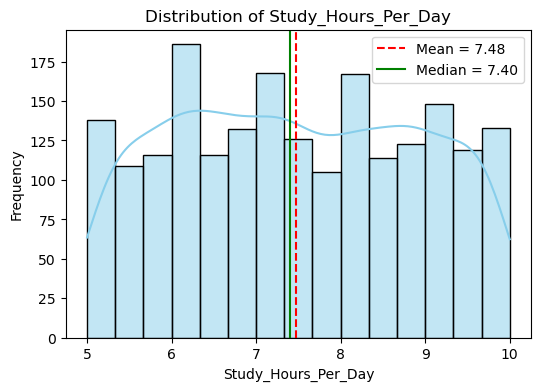

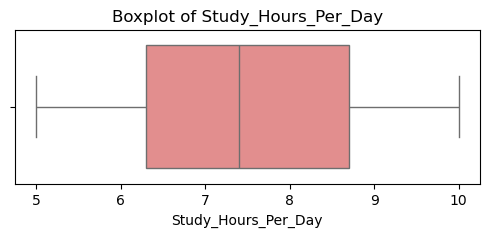

Feature: Physical_Activity_Hours_Per_Day
  Mean: 4.33
  Median: 4.10
  Mode: 4.3
--------------------------------------------------


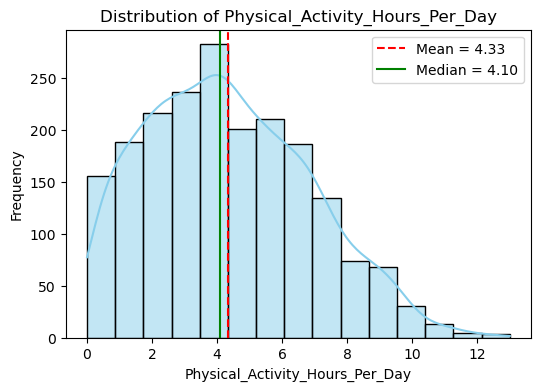

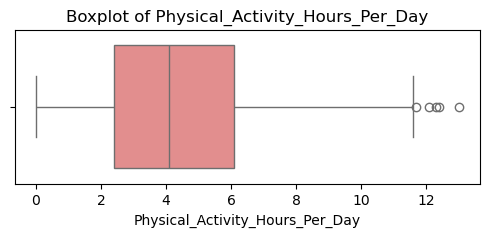

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Numerical columns to analyze
num_cols = ["Sleep_Hours_Per_Day", "Study_Hours_Per_Day", "Physical_Activity_Hours_Per_Day"]

for col in num_cols:
    print(f"Feature: {col}")
    print(f"  Mean: {df[col].mean():.2f}")
    print(f"  Median: {df[col].median():.2f}")
    print(f"  Mode: {df[col].mode()[0]}")
    print("-"*50)
    
    # Plot Histogram
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=15, color="skyblue")
    plt.axvline(df[col].mean(), color='red', linestyle='--', label=f"Mean = {df[col].mean():.2f}")
    plt.axvline(df[col].median(), color='green', linestyle='-', label=f"Median = {df[col].median():.2f}")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()
    
    # Plot Boxplot
    plt.figure(figsize=(6,2))
    sns.boxplot(x=df[col], color="lightcoral")
    plt.title(f"Boxplot of {col}")
    plt.show()


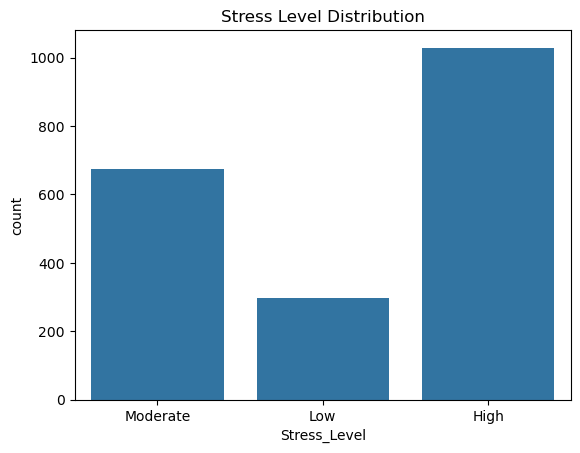

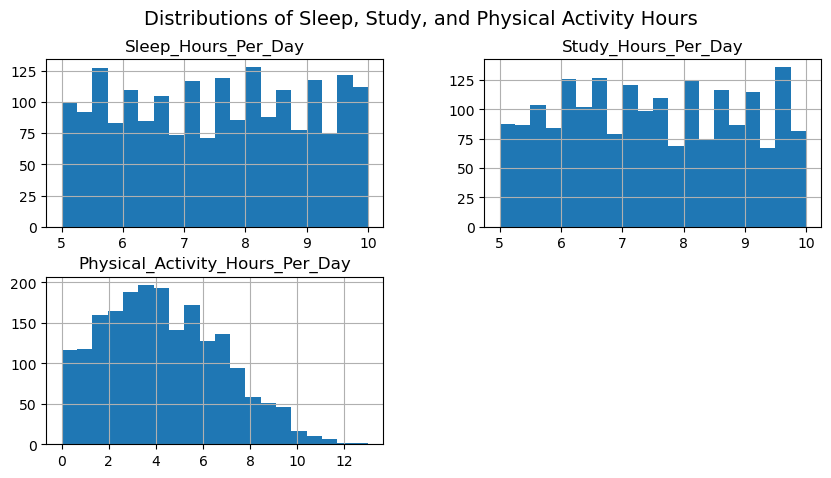

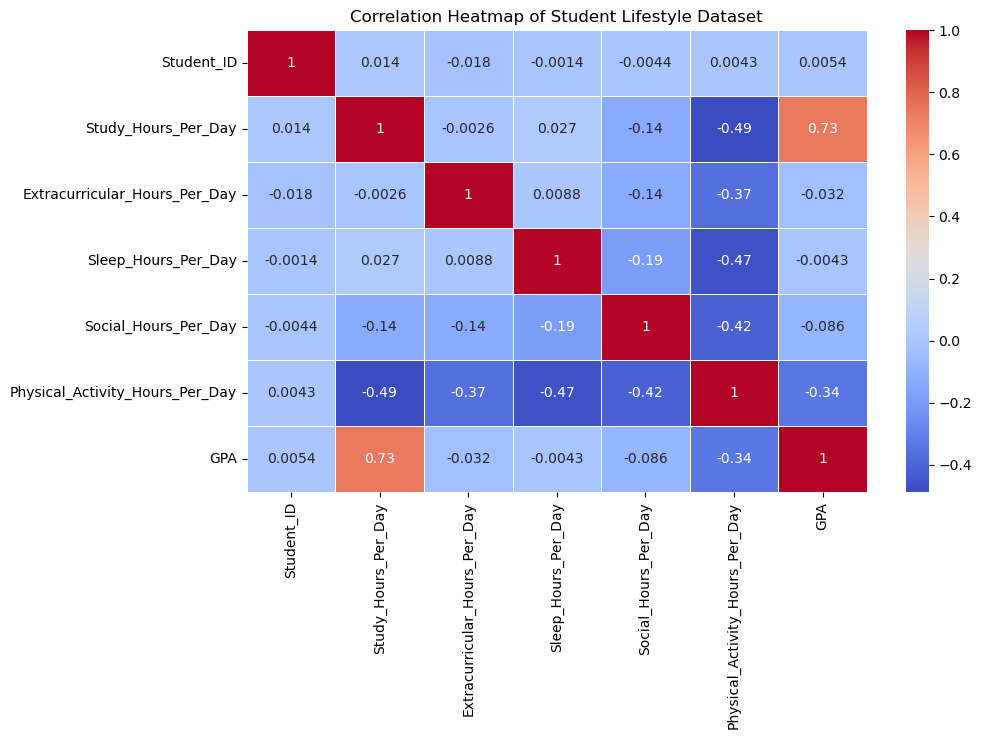

In [25]:

sns.countplot(x="Stress_Level", data=df)
plt.title("Stress Level Distribution")
plt.show()


# Feature distributions (Histograms)
df[["Sleep_Hours_Per_Day", "Study_Hours_Per_Day", "Physical_Activity_Hours_Per_Day"]].hist(
    bins=20, figsize=(10,5)
)
plt.suptitle("Distributions of Sleep, Study, and Physical Activity Hours", fontsize=14)
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10,6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Student Lifestyle Dataset")
plt.show()


In [26]:
df=df.dropna()
features=["Sleep_Hours_Per_Day", "Study_Hours_Per_Day", "Physical_Activity_Hours_Per_Day"]
target="Stress_Level"
X=df[features]
y=df[target]
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Stress_Level_Encoded"] = le.fit_transform(df["Stress_Level"])

X = df.drop(["Student_ID", "Stress_Level", "Stress_Level_Encoded"], axis=1)
y = df["Stress_Level_Encoded"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
xgb_model = xgb.XGBClassifier(eval_metric="mlogloss", random_state=42)

xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb, target_names=le.classes_))


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

        High       1.00      1.00      1.00       206
         Low       1.00      1.00      1.00        59
    Moderate       1.00      1.00      1.00       135

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



In [29]:
!pip install shap

<Figure size 800x600 with 0 Axes>

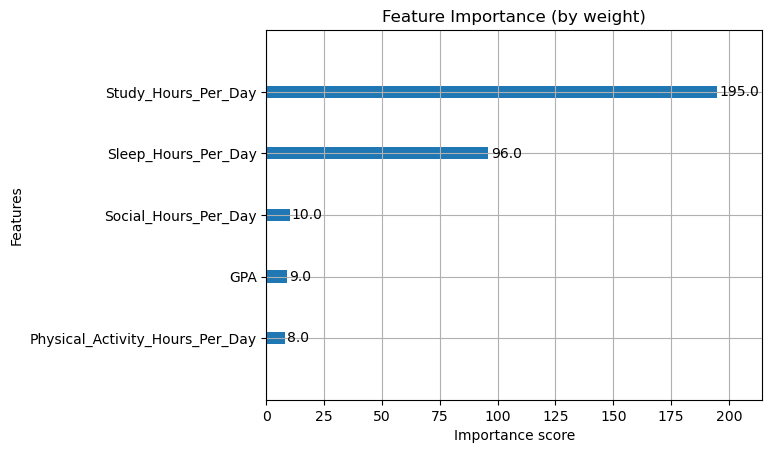

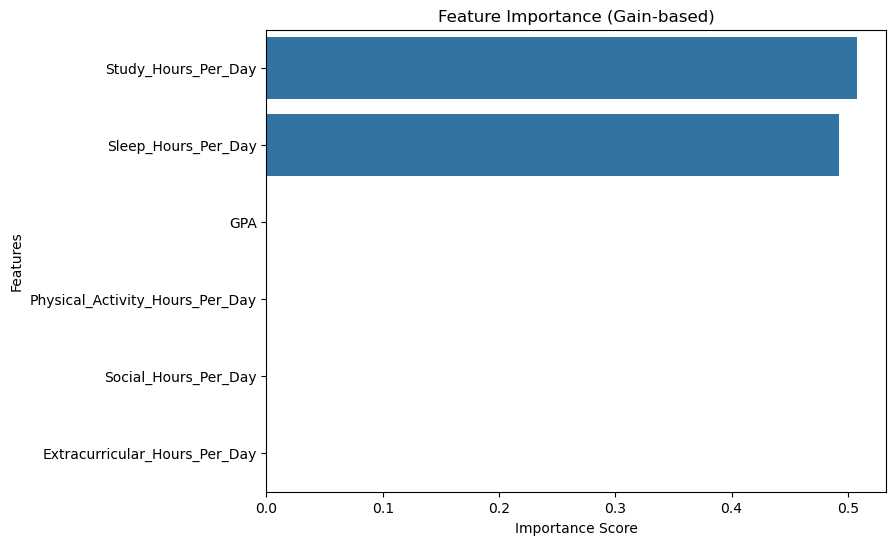

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import xgboost as xgb
import pandas as pd
import numpy as np

# =========================
# 1. XGBoost Feature Importance (Weight)
# =========================

plt.figure(figsize=(8, 6))
xgb.plot_importance(xgb_model, importance_type="weight")
plt.title("Feature Importance (by weight)")
plt.show()

# =========================
# 2. Gain-based Feature Importance (SAFE)
# =========================

feature_names = xgb_model.get_booster().feature_names

feature_importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": xgb_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(data=feature_importance_df, x="Importance", y="Feature")
plt.title("Feature Importance (Gain-based)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# =========================
# 3. SHAP Explainability (XGBoost FIXED)
# =========================

explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

# Select class (for multi-class)
class_idx = 1

# 🔴 IMPORTANT FIX: remove bias column
shap_values_fixed = shap_values[class_idx][:, :-1]




Available columns: ['Student_ID', 'Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day', 'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day', 'Physical_Activity_Hours_Per_Day', 'GPA', 'Stress_Level', 'Stress_Level_Encoded']


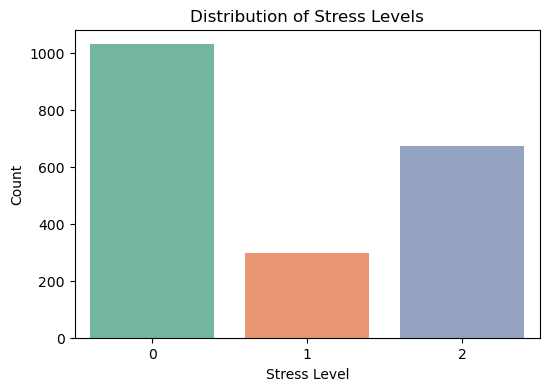

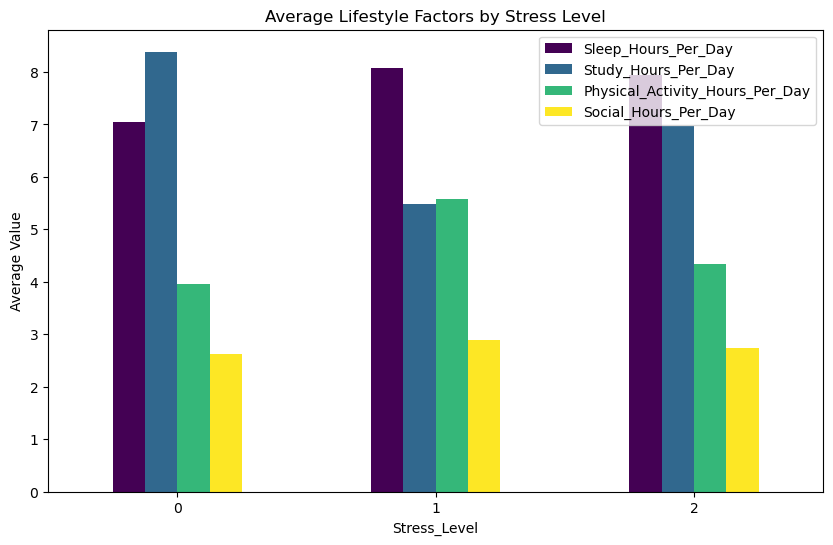

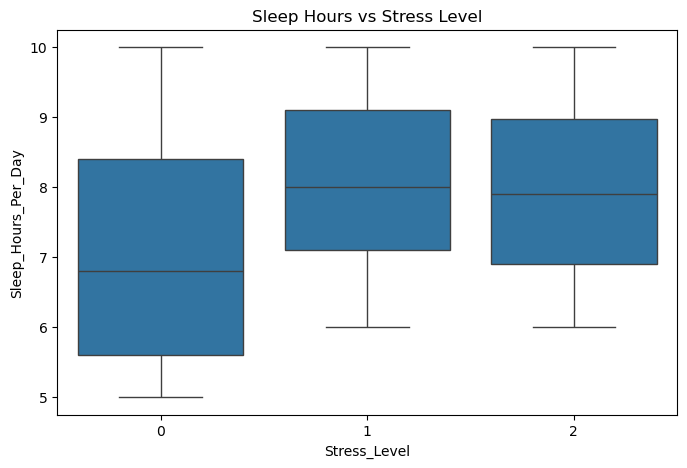

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check available columns
available_cols = df.columns.tolist()
print("Available columns:", available_cols)

# List of lifestyle-related columns we expect
expected_cols = [
    "Sleep_Hours_Per_Day",
    "Study_Hours_Per_Day",
    "Physical_Activity_Hours_Per_Day",
    "Screen_Time_Hours_Per_Day",
    "Social_Hours_Per_Day",
    "Caffeine_Intake"
]

# Keep only the ones that actually exist
cols = [c for c in expected_cols if c in df.columns]

# --- Stress Level Distribution ---
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Stress_Level", hue="Stress_Level", palette="Set2", legend=False)
plt.title("Distribution of Stress Levels")
plt.xlabel("Stress Level")
plt.ylabel("Count")
plt.show()

# --- Average Lifestyle Factors by Stress Level ---
if "Stress_Level" in df.columns:
    df.groupby("Stress_Level")[cols].mean().plot(kind="bar", figsize=(10,6), colormap="viridis")
    plt.title("Average Lifestyle Factors by Stress Level")
    plt.ylabel("Average Value")
    plt.xticks(rotation=0)
    plt.show()

# --- Correlation Heatmap ---
if "Stress_Score" in df.columns:
    plt.figure(figsize=(10,6))
    sns.heatmap(df[cols + ["Stress_Score"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Between Lifestyle Factors and Stress Score")
    plt.show()

# --- Boxplot (Stress vs Sleep) ---
if "Sleep_Hours_Per_Day" in df.columns and "Stress_Level" in df.columns:
    plt.figure(figsize=(8,5))
    sns.boxplot(data=df, x="Stress_Level", y="Sleep_Hours_Per_Day")
    plt.title("Sleep Hours vs Stress Level")
    plt.show()


In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns


In [43]:
# Encode categorical columns if they exist
le = LabelEncoder()

for col in df.select_dtypes(include=["object"]).columns:
    df[col] = le.fit_transform(df[col].astype(str))
    le.head()


In [44]:
# X = features, y = target
X = df.drop(["Stress_Level"], axis=1)   # features
y = df["Stress_Level"]                  # target


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features for algorithms like SVM & KNN
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



Logistic Regression Results:
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       206
           1       1.00      1.00      1.00        67
           2       1.00      1.00      1.00       127

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



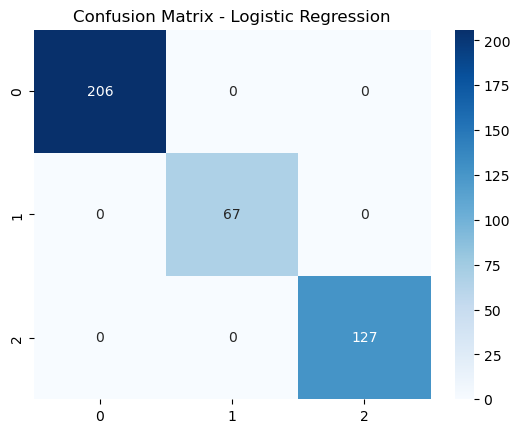


Random Forest Results:
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       206
           1       1.00      1.00      1.00        67
           2       1.00      1.00      1.00       127

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



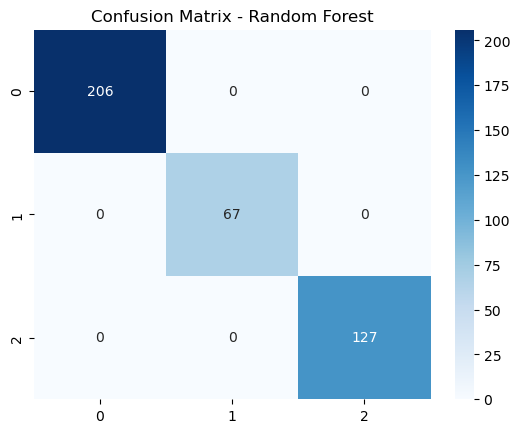


SVM Results:
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       206
           1       1.00      1.00      1.00        67
           2       1.00      1.00      1.00       127

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



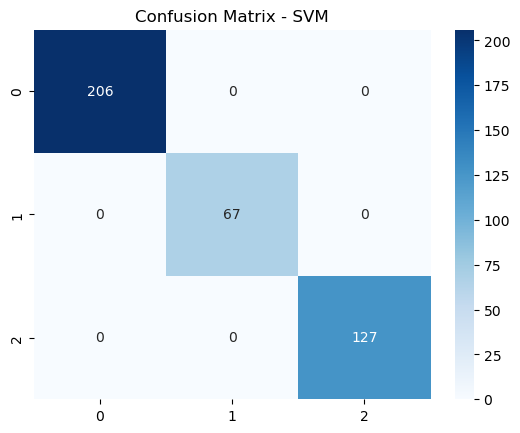


KNN Results:
Accuracy: 0.9975
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       206
           1       0.99      1.00      0.99        67
           2       1.00      0.99      1.00       127

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



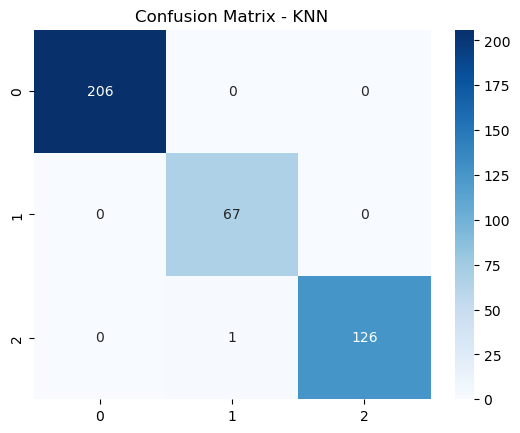

In [46]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel="rbf", probability=True, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    
    print(f"\n{name} Results:")
    print("Accuracy:", acc)
    print(classification_report(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()


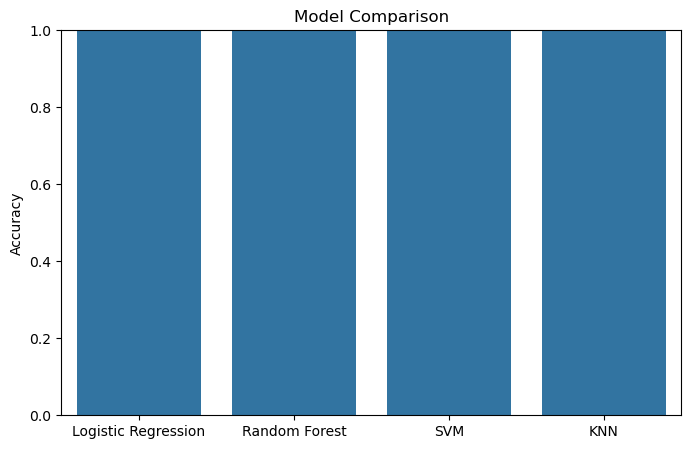

In [47]:
plt.figure(figsize=(8,5))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title("Model Comparison")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.show()


<H1>“Accuracy alone is not sufficient for healthcare-related problems.”</H1>